### 1) Data Description

- **Dataset overview:**  
  `players.csv` (196 rows, 7 variables), `sessions.csv` (1535 rows, 5 variables), collected from UBC CS MineCraft server logs.

- **Key variables in players.csv:**  
  - `experience` (Beginner, Amateur, Regular)  
  - `hashedEmail` (unique player ID)  
  - `gender` (Male, Female, Non-binary, etc.)  
  - `played_hours` (total hours played)  
  - `Age`  
  - `subscribe` (TRUE/FALSE)

- **Key variables in sessions.csv:**  
  - `hashedEmail`, `start_time`, `end_time`, `original_start_time`, `original_end_time`

- **Potential issues:**  
  - Some players might have multiple accounts, which can cause duplicates.  
  - Some sessions may be missing due to server issues



### 2) Questions

- **Broad question:**  
  Which kinds of players play most and contribute the most data?

- **Specific question:**  
  Can experience level, age, and gender predict total hours played?

- **Data usage:**  
  I’ll use `players.csv` to model `played_hours` as the outcome variable, with experience, age, and gender as predictors.  
  I'd like to explore the data and visualize it to see patterns. Then convert categorical variables to factors, check for missing values, and scale numeric variables if needed. Finally, I can split the data into training, validation, and test sets, and use regression or KNN to make predictions.




In [1]:
library(tidyverse)
library(dplyr)

players <- read_csv("players.csv")
sessions <- read_csv("sessions.csv")

players$experience <- as.factor(players$experience)
players$gender <- as.factor(players$gender)
players$subscribe <- as.factor(players$subscribe)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimite

In [2]:
players |> summarise(min = round(min(played_hours, na.rm = TRUE), 2),
    max = round(max(played_hours, na.rm = TRUE), 2),
    mean = round(mean(played_hours, na.rm = TRUE), 2),
    median = round(median(played_hours, na.rm = TRUE), 2))
players |> summarise(min = round(min(Age, na.rm = TRUE), 2),
    max = round(max(Age, na.rm = TRUE), 2),
    mean = round(mean(Age, na.rm = TRUE), 2),
    median = round(median(Age, na.rm = TRUE), 2))

min,max,mean,median
<dbl>,<dbl>,<dbl>,<dbl>
0,223.1,5.85,0.1


min,max,mean,median
<dbl>,<dbl>,<dbl>,<dbl>
9,58,21.14,19


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


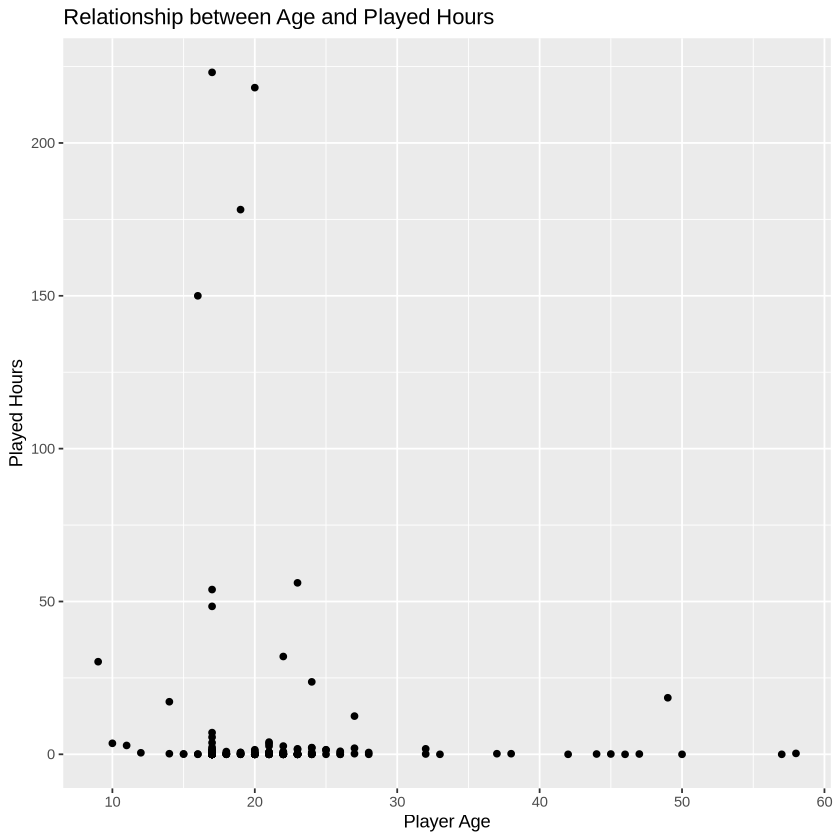

In [3]:
graph1<-ggplot(players, aes(x = Age, y = played_hours)) +
  geom_point() +
  labs(title = "Relationship between Age and Played Hours",
    x = "Player Age",
    y = "Played Hours")
graph1

There seems to be a weak relationship between age and played hours. The points look more like a cloud than a clear line, but younger players appear to play slightly more on average.

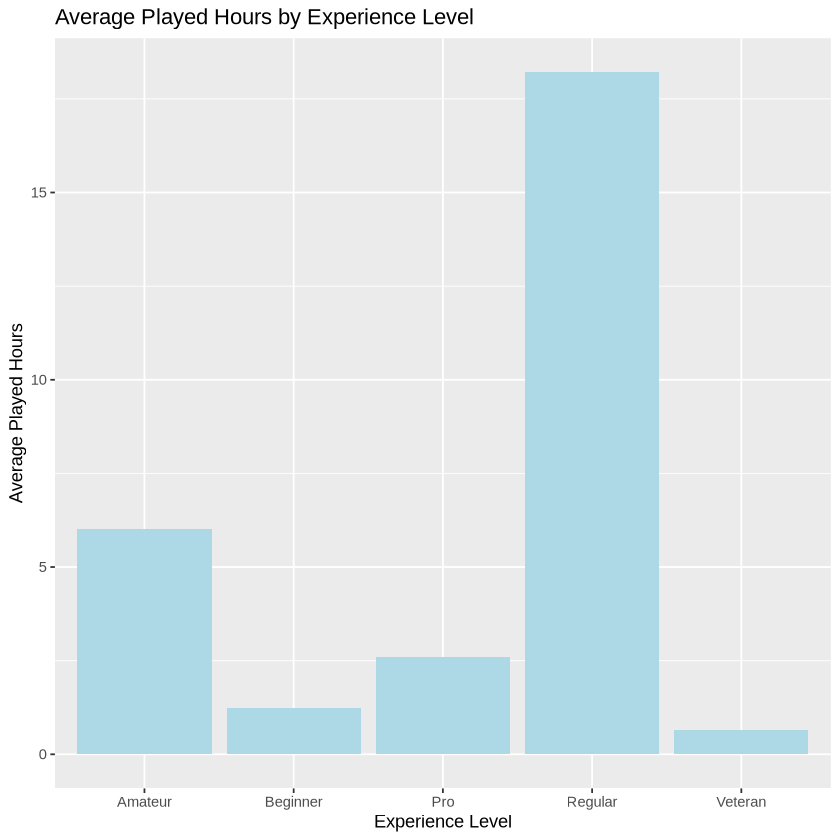

In [4]:
players_avg <- players|>
  group_by(experience) |>
  summarize(mean_hours = mean(played_hours, na.rm = TRUE))

graph2<-ggplot(players_avg, aes(x = experience, y = mean_hours)) +
  geom_col(fill = "lightblue") +
  labs(title = "Average Played Hours by Experience Level",
    x = "Experience Level",
    y = "Average Played Hours")
graph2

This bar chart shows that Regular players spend the most hours in the game, while Beginners and Veterans play the least.This could mean that experience level affects total played time.

### 3) Methods and Plan

- **Model:** K-nearest neighbors (KNN) regression to predict `played_hours` from age, experience, and gender.  

- **Why this method:** I think total play time isn’t perfectly linear with age or experience, and KNN is simple and can capture more complex patterns.  

- **Assumptions/Limitations:** KNN works best when numeric variables are on a similar scale. It can be affected by noisy data and can slow down if the dataset is large.  

- **Model selection:** I’ll use cross-validation to pick the best k that gives the lowest RMSPE.  

- **Data processing:** Handle missing values, convert experience and gender to factors, scale numeric variables, split data like 70% train, and tune KNN using a tidymodels workflow to avoid overfitting and get reliable performance.
